# Penjualan Toko Roti Korea - Preprocessing dan Visualisasi 

Saya selalu suka wangi toko roti yang baru saja buka. Tercium harumnya kayu manis, wangi cokelat panggang, dan kadang aroma kopi yang baru saja keluar dari mesin *espresso*. Semua wewangian itu tak pernah gagal membujuk saya untuk mampir sebentar melihat roti segar yang baru saja matang.

Kesukaan saya terhadap toko roti itu membuat saya tertarik terhadap data yang saya temukan di [kaggle](https://www.kaggle.com/hosubjeong/bakery-sales) ini. Dalam keterangannya, data ini merupakan data transaksi sebuah toko roti di Korea. 

Setelah melihat dataset ini, saya tertarik untuk mencari tahu:
1. Apa produk terlaris di toko roti tersebut?
2. Bagaimana tren penjualan di toko roti tersebut?

Preprocessing dan visualisasi pada project kali ini menggunakan bahasa pemrograman Python.

## 1. Import Packages

Package yang akan digunakan pada analisis data kali ini adalah pandas, numpy, dan matplotlib.

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

## 2. Import Data

Data yang akan diolah merupakan file berformat csv dengan nama `Bakery Sales.csv`.

In [ ]:
data = pd.read_csv("Bakery Sales.csv")
data

,datetime,day of week,total,place,angbutter,plain bread,jam,americano,croissant,caffe latte,tiramisu croissant,cacao deep,pain au chocolat,almond croissant,croque monsieur,mad garlic,milk tea,gateau chocolat,pandoro,cheese cake,lemon ade,orange pound,wiener,vanila latte,berry ade,tiramisu,merinque cookies
0,2019-07-11 15:35,Thur,23800.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1,2019-07-11 16:10,Thur,15800.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,2019-07-12 11:49,Fri,58000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-07-13 13:19,Sat,14800.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
4,2019-07-13 13:22,Sat,15600.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2654 entries, 0 to 2653
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datetime            2421 non-null   object 
 1   day of week         2420 non-null   object 
 2   total               2420 non-null   float64
 3   place               2166 non-null   object 
 4   angbutter           1973 non-null   float64
 5   plain bread         857 non-null    float64
 6   jam                 220 non-null    float64
 7   americano           412 non-null    float64
 8   croissant           747 non-null    float64
 9   caffe latte         193 non-null    float64
 10  tiramisu croissant  779 non-null    float64
 11  cacao deep          323 non-null    float64
 12  pain au chocolat    587 non-null    float64
 13  almond croissant    202 non-null    float64
 14  croque monsieur     0 non-null      float64
 15  mad garlic          0 non-null      float64
 16  milk t

Jumlah baris pada data tersebut sebanyak 2654 baris. Dapat dilihat bahwa banyak nilai NaN, baris yang berlebih, dan kolom yang tidak begitu perlu. Kita perlu membersihkan data tersebut terlebih dahulu sebelum mengolahnya.

## 3. Menghapus Baris dan Kolom yang Tidak Diperlukan

Untuk melihat data baris dengan seluruh nilai merupakan NaN di setiap kolom, kita dapat menggunakan:

In [ ]:
data[data.isna().all(axis=1)]

,datetime,day of week,total,place,angbutter,plain bread,jam,americano,croissant,caffe latte,tiramisu croissant,cacao deep,pain au chocolat,almond croissant,croque monsieur,mad garlic,milk tea,gateau chocolat,pandoro,cheese cake,lemon ade,orange pound,wiener,vanila latte,berry ade,tiramisu,merinque cookies
2420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2422,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2648,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Dari tabel di atas, dapat dilihat bahwa ada 233 baris yang bernilai NaN dimulai dari baris ke 2420.

Karena itu, kita akan mengambil data dari baris ke-0 hingga baris ke-2419 dengan:

In [ ]:
data = data.iloc[0:2420]

In [ ]:
data

,datetime,day of week,total,place,angbutter,plain bread,jam,americano,croissant,caffe latte,tiramisu croissant,cacao deep,pain au chocolat,almond croissant,croque monsieur,mad garlic,milk tea,gateau chocolat,pandoro,cheese cake,lemon ade,orange pound,wiener,vanila latte,berry ade,tiramisu,merinque cookies
0,2019-07-11 15:35,Thur,23800.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1,2019-07-11 16:10,Thur,15800.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,2019-07-12 11:49,Fri,58000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-07-13 13:19,Sat,14800.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
4,2019-07-13 13:22,Sat,15600.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2415,2020-05-02 11:37,Sat,19500.0,동면,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2416,2020-05-02 11:39,Sat,19800.0,후평 1동,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
2417,2020-05-02 12:15,Sat,14300.0,효자 2동,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2418,2020-05-02 13:45,Sat,15000.0,소양동,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Ada beberapa kolom yang tidak kita perlukan untuk menjawab permasalahan sebelumnya, seperti: *day of week*, *total*, dan *place*.

Kolom day of week menunjukan hari, total merupakan jumlah uang yang dibayar, dan place merupakan nama tempat dengan huruf Korea. Kita akan menghapus ketiga kolom ini dengan:

In [ ]:
data = data.drop(['day of week','place','total'], axis=1)

In [ ]:
data

,datetime,angbutter,plain bread,jam,americano,croissant,caffe latte,tiramisu croissant,cacao deep,pain au chocolat,almond croissant,croque monsieur,mad garlic,milk tea,gateau chocolat,pandoro,cheese cake,lemon ade,orange pound,wiener,vanila latte,berry ade,tiramisu,merinque cookies
0,2019-07-11 15:35,1.0,NaN,NaN,1.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1,2019-07-11 16:10,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,2019-07-12 11:49,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-07-13 13:19,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
4,2019-07-13 13:22,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2415,2020-05-02 11:37,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2416,2020-05-02 11:39,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
2417,2020-05-02 12:15,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2418,2020-05-02 13:45,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 4. Mengisi NaN dengan 0

Nilai NaN pada data akan diganti menjadi 0 karena pada aslinya nilai NaN menunjukkan produk pada kategori itu tidak dibeli pada transaksi tersebut.

In [ ]:
data = data.fillna(0)

In [ ]:
data

,datetime,angbutter,plain bread,jam,americano,croissant,caffe latte,tiramisu croissant,cacao deep,pain au chocolat,almond croissant,croque monsieur,mad garlic,milk tea,gateau chocolat,pandoro,cheese cake,lemon ade,orange pound,wiener,vanila latte,berry ade,tiramisu,merinque cookies
0,2019-07-11 15:35,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2019-07-11 16:10,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2019-07-12 11:49,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019-07-13 13:19,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2019-07-13 13:22,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2415,2020-05-02 11:37,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2416,2020-05-02 11:39,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2417,2020-05-02 12:15,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2418,2020-05-02 13:45,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 5. Mengganti format tanggal


Karena jenis data pada kolom datetime masih merupakan object, kita akan menggantinya menjadi datetime.

In [ ]:
data['datetime'] =  pd.to_datetime(data['datetime'], format='%Y-%m-%d %H:%M')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2420 entries, 0 to 2419
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   datetime            2420 non-null   datetime64[ns]
 1   angbutter           2420 non-null   float64       
 2   plain bread         2420 non-null   float64       
 3   jam                 2420 non-null   float64       
 4   americano           2420 non-null   float64       
 5   croissant           2420 non-null   float64       
 6   caffe latte         2420 non-null   float64       
 7   tiramisu croissant  2420 non-null   float64       
 8   cacao deep          2420 non-null   float64       
 9   pain au chocolat    2420 non-null   float64       
 10  almond croissant    2420 non-null   float64       
 11  croque monsieur     2420 non-null   float64       
 12  mad garlic          2420 non-null   float64       
 13  milk tea            2420 non-null   float64     

In [ ]:
data["datetime"] = data["datetime"].dt.date
data = data.rename(columns={'datetime':'date'})

Data tersebut sudah berjenis datetime dan hanya mengandung tanggal.

## 6. Mengubah data menjadi perhari

Karena dalam satu tanggal terdapat beberapa transaksi, data akan digrup berdasarkan tanggalnya sehingga menjadi datar perhari.

In [ ]:
data = data.groupby('date').sum()

In [ ]:
data

,angbutter,plain bread,jam,americano,croissant,caffe latte,tiramisu croissant,cacao deep,pain au chocolat,almond croissant,croque monsieur,mad garlic,milk tea,gateau chocolat,pandoro,cheese cake,lemon ade,orange pound,wiener,vanila latte,berry ade,tiramisu,merinque cookies
date,,,,,,,,,,,,,,,,,,,,,,,
2019-07-11,2.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2019-07-12,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-07-13,8.0,3.0,0.0,0.0,0.0,0.0,5.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0
2019-07-14,15.0,0.0,1.0,3.0,0.0,1.0,9.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0
2019-07-15,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-27,11.0,7.0,1.0,3.0,8.0,1.0,8.0,6.0,6.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0
2020-04-29,7.0,7.0,0.0,1.0,2.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2020-04-30,7.0,3.0,0.0,2.0,1.0,0.0,4.0,2.0,2.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0


Terlihat bahwa jumlah data berkurang menjadi 249 baris.

## 7. Membuat kolom total 

Kolom total merupakan jumlah produk yang dijual pada tanggal tersebut. Kolom total dihitung dengan menjumlahkan nilai setiap kolom pada baris tertentu.

In [ ]:
data['total'] = data.sum(axis=1)

In [ ]:
data

,angbutter,plain bread,jam,americano,croissant,caffe latte,tiramisu croissant,cacao deep,pain au chocolat,almond croissant,croque monsieur,mad garlic,milk tea,gateau chocolat,pandoro,cheese cake,lemon ade,orange pound,wiener,vanila latte,berry ade,tiramisu,merinque cookies,total
date,,,,,,,,,,,,,,,,,,,,,,,,
2019-07-11,2.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,9.0
2019-07-12,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0
2019-07-13,8.0,3.0,0.0,0.0,0.0,0.0,5.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,23.0
2019-07-14,15.0,0.0,1.0,3.0,0.0,1.0,9.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,43.0
2019-07-15,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-27,11.0,7.0,1.0,3.0,8.0,1.0,8.0,6.0,6.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,58.0
2020-04-29,7.0,7.0,0.0,1.0,2.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,25.0
2020-04-30,7.0,3.0,0.0,2.0,1.0,0.0,4.0,2.0,2.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,29.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 249 entries, 2019-07-11 to 2020-05-02
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   angbutter           249 non-null    float64
 1   plain bread         249 non-null    float64
 2   jam                 249 non-null    float64
 3   americano           249 non-null    float64
 4   croissant           249 non-null    float64
 5   caffe latte         249 non-null    float64
 6   tiramisu croissant  249 non-null    float64
 7   cacao deep          249 non-null    float64
 8   pain au chocolat    249 non-null    float64
 9   almond croissant    249 non-null    float64
 10  croque monsieur     249 non-null    float64
 11  mad garlic          249 non-null    float64
 12  milk tea            249 non-null    float64
 13  gateau chocolat     249 non-null    float64
 14  pandoro             249 non-null    float64
 15  cheese cake         249 non-null    float64
 1

Data tersebut sudah bersih. Selanjutnya, kita dapat membuat grafik untuk menjawab permasalahan di awal.

## 8. Produk terlaris

In [ ]:
produk = data.sum(axis=0).sort_values()
produk

mad garlic                0.0
croque monsieur           0.0
tiramisu                  7.0
lemon ade                38.0
merinque cookies         49.0
berry ade                55.0
cheese cake              92.0
milk tea                160.0
gateau chocolat         210.0
caffe latte             214.0
almond croissant        235.0
vanila latte            241.0
jam                     249.0
cacao deep              364.0
pandoro                 394.0
wiener                  476.0
americano               513.0
orange pound            566.0
pain au chocolat        726.0
tiramisu croissant      945.0
plain bread            1028.0
croissant              1049.0
angbutter              3229.0
total                 10840.0
dtype: float64

In [ ]:
produk = produk.drop('total')

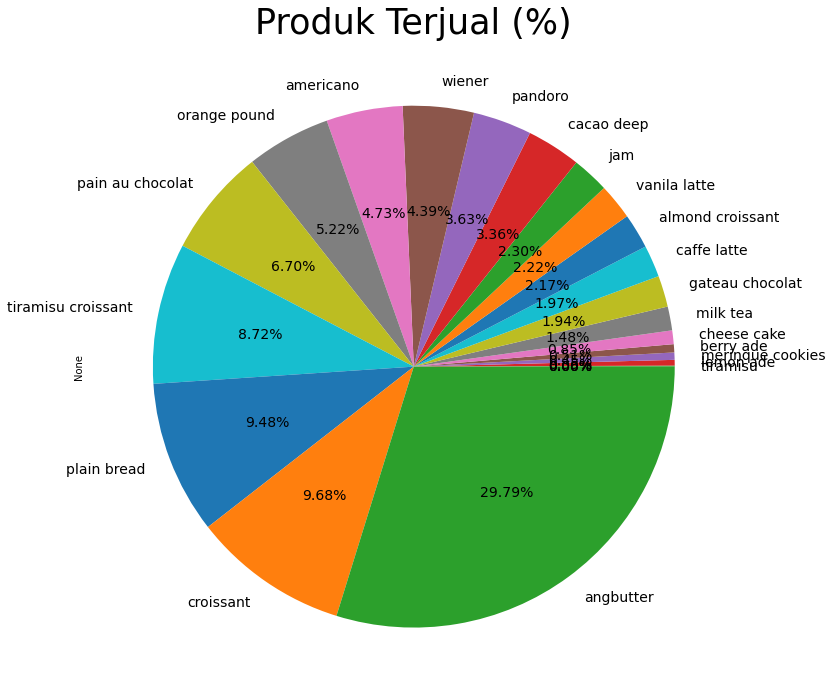

In [ ]:
produk.plot(kind='pie',fontsize=14,autopct=lambda p:f'{p:.2f}%',
               figsize=(15,12))
plt.title("Produk Terjual (%)",fontsize=35)
plt.show()

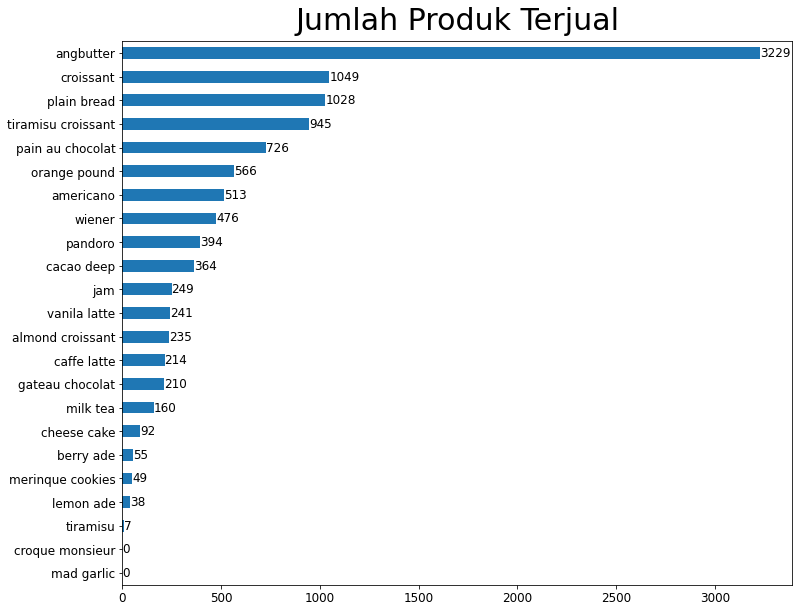

In [ ]:
plot = produk.plot(kind='barh',figsize=(12,10),fontsize=12)
plot.set_title("Jumlah Produk Terjual", fontsize=30, y=1.01)
for i in plot.patches:
    plot.text(i.get_width()+.1, i.get_y()+.10, \
            str(round((i.get_width()))), fontsize=12, color='black')
plt.show()

## 9. Tren Penjualan Produk

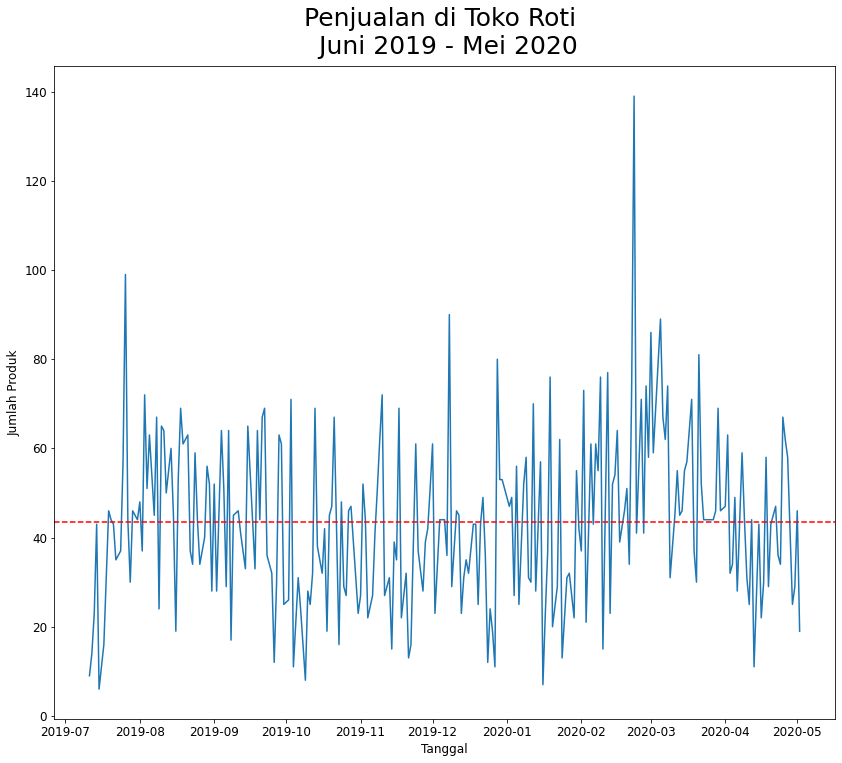

In [ ]:
data['total'].plot(kind='line', figsize=(14,12),fontsize=12)
plt.axhline(y=data['total'].mean(), linestyle='--',color='r')
plt.title("Penjualan di Toko Roti \n Juni 2019 - Mei 2020",fontsize=25,y=1.01)
plt.xlabel("Tanggal", fontsize=12)
plt.ylabel("Jumlah Produk", fontsize=12)
plt.show()